<a href="https://colab.research.google.com/github/Rohithsrr/YBI-FOUNDATION/blob/main/MILEAGE_PREDICTION_YBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MILEAGE PREDICTION - REGRESSION ANALYSIS**

**Objective**: To predict the mileage of the car accurately.

**Data Source**:This dataset was taken from the YBI Foundation GitHUb Repository.


*Attribute information*:

1. mpg:continuous
2. cylinders:multi-valued discrete
3. displacement:continuous
4. horsepower:continuous
5. weight:continuous
6. acceleration:continuous
7. model year:multi-valued discrete
8. origin:multi-valued discrete
9. car name: string(unique for each instance).












# IMPORT LIBRARY

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

# IMPORT DATA

In [ ]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# DATA PREPROCESSING


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# REMOVE MISSING VALUES

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# DATA VISUALIZATION

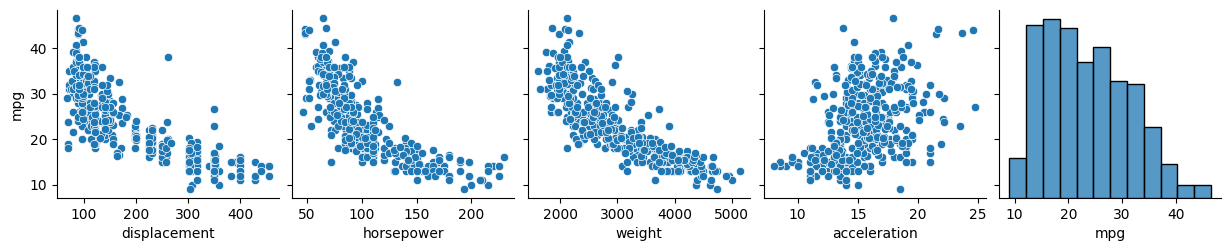

In [ ]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg']);

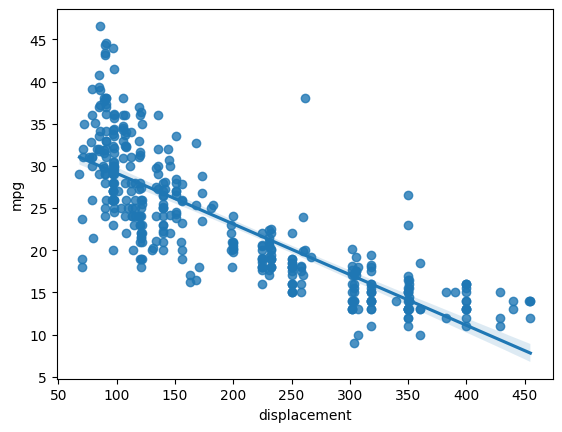

In [ ]:
sns.regplot(x='displacement',y='mpg',data=df);

# DEFINE TARGET VARIABLE (y) AND FEATURE(x)

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y=df['mpg']

In [ ]:
y.shape

(392,)

In [ ]:
x=df[['displacement', 'horsepower', 'weight','acceleration']]

In [ ]:
x.shape

(392, 4)

In [ ]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


# SCALING DATA

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
x=ss.fit_transform(x)

In [ ]:
x


array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [ ]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


# TRAIN TEST SPLIT


In [ ]:
  from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2529)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((313, 4), (79, 4), (313,), (79,))

#LINEAR REFRESSION MODEL

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.intercept_

23.60937384364459

In [ ]:
lr.coef_

array([-0.69777083, -2.02654745, -4.33713504, -0.08995614])

**Mileage=23.6-0.69Displacement-2.02HorsePower-4.33Weight-o.089Accelearation+error**

#PREDICT TEST DATA

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
y_pred

array([18.52334431, 15.1226187 , 14.20172734, 23.80680131, 30.08773214,
       23.96803267, 26.67064899, 24.82516978, 15.04112188, 11.74952166,
       24.34210835, 28.20102108, 32.02597531, 31.33824981, 18.41304082,
       19.46721332, 28.50296377, 32.63661587, 31.49404791, 27.38404496,
       18.93602572, 22.87878993, 26.58036841, 33.02179577, 20.82874582,
        8.2963491 , 21.96979528, 18.18855059, 25.03202319, 15.14215546,
       23.50480904, 17.11521971,  9.14437021, 30.25296541, 20.66763257,
       29.39416605, 24.26413493, 22.00229499, 10.27165352, 12.86711738,
       21.67854097, 20.04974935,  5.57445988, 17.8465281 , 22.88020689,
       29.61599119, 13.19689674, 25.93480281, 29.58342872, 22.6126486 ,
       22.44918551, 16.71161969, 24.16064446, 30.45605297,  9.85654474,
        9.16785534, 28.48349934, 23.94556948, 20.16972551, 31.08023125,
       21.0194814 , 26.9011386 , 23.31519146, 14.05758774, 24.47267615,
       27.01557528, 15.26607549, 24.44815473, 31.19689858, 14.81

#MODEL ACCURACY

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [ ]:
mean_absolute_error(y_test,y_pred)

3.2171285503964566

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.1577101524465804

In [ ]:
r2_score(y_test,y_pred)

0.6476525839474243

#POLYNOMIAL REGRESSION


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly=PolynomialFeatures(degree=2,interaction_only=True, include_bias=False)

In [ ]:
x_train2=poly.fit_transform(x_train)

In [ ]:
x_test2=poly.fit_transform(x_test)

In [ ]:
lr.fit(x_train2,y_train)

LinearRegression()

In [ ]:
lr.intercept_

21.415527356858462

In [ ]:
lr.coef_

array([-2.74552791, -5.48577244, -1.23394304, -1.17267999,  1.26124532,
       -0.20956575, -0.00696421,  1.20533006, -0.69386775,  0.67455051])

In [ ]:
y_pred_poly=lr.predict(x_test2)

#MODEL ACCURACY

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [ ]:
mean_absolute_error(y_test,y_pred_poly)

2.540106544685012

In [ ]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.11796323730756542

In [ ]:
r2_score(y_test,y_pred_poly)

0.7109999377201482